<a href="https://colab.research.google.com/github/Naveen032006/Computer-vision/blob/main/DISCRETE_FOURIER_TRANSFORM%2C_HISTOGRAM_PROCESSING%2C_LINEAR_FILTERING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

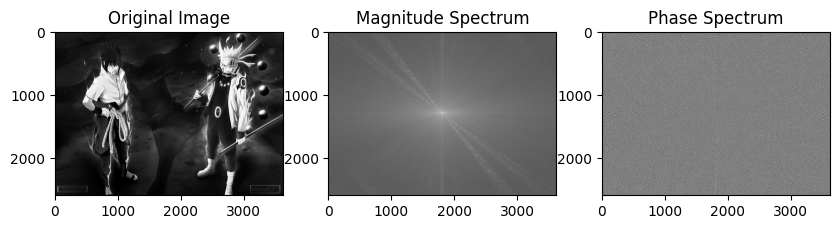

In [1]:
import cv2

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

img=cv2.imread('naruto.png',0)

fourier=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)

f_shift=np.fft.fftshift(fourier)

magnitude=20*np.log(cv2.magnitude(f_shift[:,:,0],f_shift[:,:,1])+1)

phase=np.angle(f_shift[:,:,0]+1j*f_shift[:,:,1])

magnitude=cv2.normalize(magnitude,None,0,255,cv2.NORM_MINMAX,cv2.CV_8UC1)

plt.figure(figsize=(10, 5))


plt.subplot(1, 3, 1)

plt.imshow(img, cmap='gray')

plt.title('Original Image')


plt.subplot(1, 3, 2)

plt.imshow(magnitude, cmap='gray')

plt.title('Magnitude Spectrum')


plt.subplot(1, 3, 3)

plt.imshow(phase, cmap='gray')

plt.title('Phase Spectrum')


plt.show()

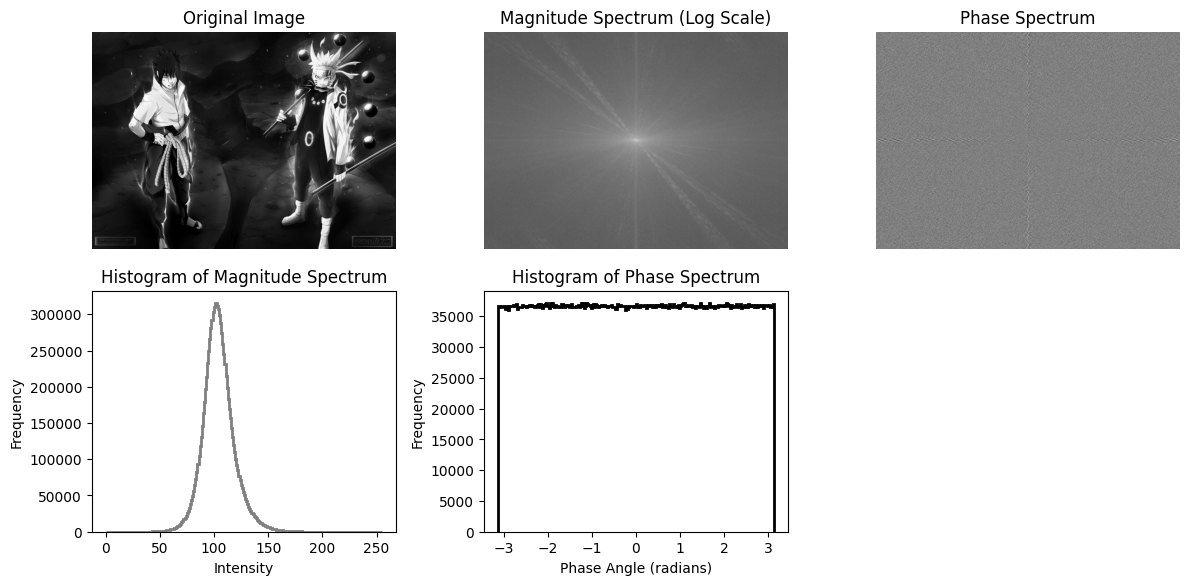

In [2]:
import cv2

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

img=cv2.imread('naruto.png',0)

fourier=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)

f_shift=np.fft.fftshift(fourier)

magnitude=20*np.log(cv2.magnitude(f_shift[:,:,0],f_shift[:,:,1])+1)

phase=np.angle(f_shift[:,:,0]+1j*f_shift[:,:,1])

magnitude=cv2.normalize(magnitude,None,0,255,cv2.NORM_MINMAX,cv2.CV_8UC1)

plt.figure(figsize=(12, 6))


# Original Image

plt.subplot(2, 3, 1)

plt.imshow(img, cmap='gray')

plt.title("Original Image")

plt.axis('off')


# Magnitude Spectrum

plt.subplot(2, 3, 2)

plt.imshow(magnitude, cmap='gray')

plt.title("Magnitude Spectrum (Log Scale)")

plt.axis('off')



plt.subplot(2, 3, 3)

plt.imshow(phase, cmap='gray')

plt.title("Phase Spectrum")

plt.axis('off')


plt.subplot(2, 3, 4)

plt.hist(magnitude.ravel(), bins=256, color='gray', histtype='step', linewidth=2)

plt.title("Histogram of Magnitude Spectrum")

plt.xlabel("Intensity")

plt.ylabel("Frequency")


plt.subplot(2, 3, 5)

plt.hist(phase.ravel(), bins=256, color='black', histtype='step', linewidth=2)

plt.title("Histogram of Phase Spectrum")

plt.xlabel("Phase Angle (radians)")

plt.ylabel("Frequency")


plt.tight_layout()

plt.show()

Original Min: 0, Max: 255
Original Image Matrix:
[[34 31 31 ... 45 44 47]
 [30 37 30 ... 48 39 43]
 [33 34 35 ... 40 36 43]
 ...
 [25 26 25 ...  5  4  4]
 [28 26 28 ...  4  3  4]
 [26 26 27 ...  3  2  3]]
Stretched Image Matrix:
[[34 31 31 ... 45 44 47]
 [30 37 30 ... 48 39 43]
 [33 34 35 ... 40 36 43]
 ...
 [25 26 25 ...  5  4  4]
 [28 26 28 ...  4  3  4]
 [26 26 27 ...  3  2  3]]


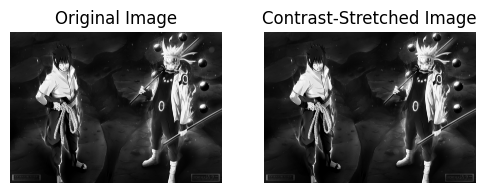

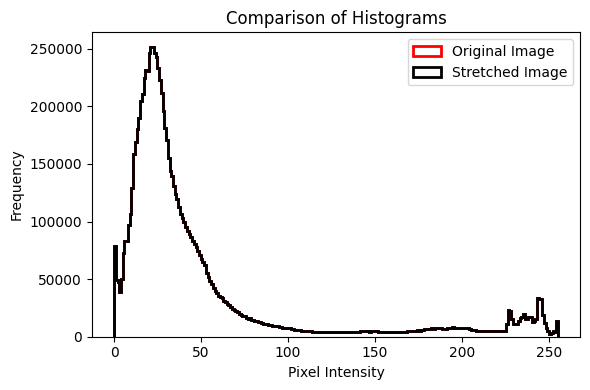

In [4]:
import cv2

import numpy as np

import matplotlib.pyplot as plt


# Load the image in grayscale

image = cv2.imread('naruto.png', cv2.IMREAD_GRAYSCALE) # Load the image in grayscale


if image is None:

  raise FileNotFoundError("Image not found. Check the file path.")


# Get min and max pixel values of the original image

f_min, f_max = np.min(image), np.max(image)


# Check the min and max values to see the dynamic range

print(f"Original Min: {f_min}, Max: {f_max}")


# Apply contrast stretching

stretched_image = (image - f_min) * (255.0 / (f_max - f_min))

stretched_image = np.clip(stretched_image, 0, 255).astype(np.uint8) # Ensure values are valid


# Printing matrices for both images

print("Original Image Matrix:")

print(image)

print("Stretched Image Matrix:")

print(stretched_image)


# Plot the images and histograms for comparison

plt.figure(figsize=(6, 6))


# Original Image

plt.subplot(1, 2, 1)

plt.imshow(image, cmap='gray')

plt.title("Original Image")

plt.axis('off')


# Contrast-Stretched Image

plt.subplot(1, 2, 2)

plt.imshow(stretched_image, cmap='gray')

plt.title("Contrast-Stretched Image")

plt.axis('off')


# Plotting a single combined histogram for comparison

plt.figure(figsize=(6, 4))

plt.hist(image.ravel(), bins=256, color='red', histtype='step', linewidth=2, label="Original Image")

plt.hist(stretched_image.ravel(), bins=256, color='black', histtype='step', linewidth=2, label="Stretched Image")

plt.title("Comparison of Histograms")

plt.xlabel("Pixel Intensity")

plt.ylabel("Frequency")

plt.legend()


plt.tight_layout()

plt.show()

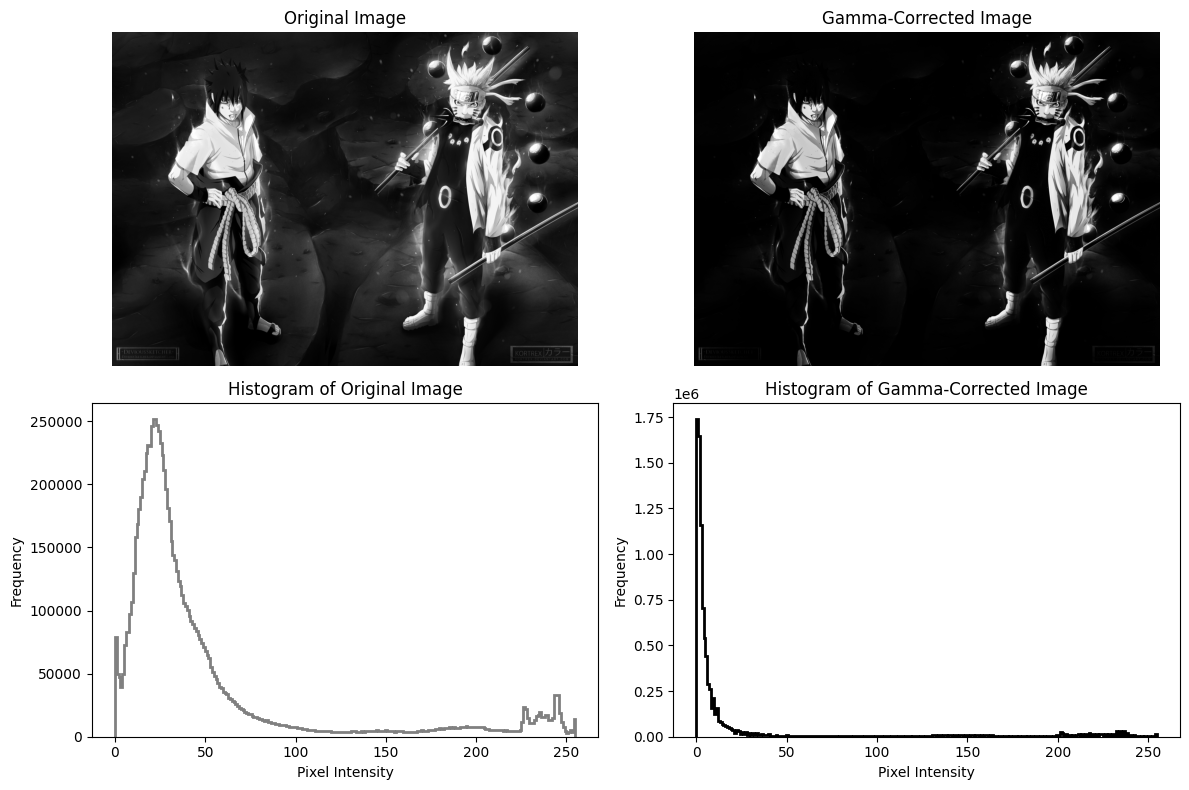

In [6]:
# Gamma Correction: Apply gamma to the image pixel values

def gamma_correction(image, gamma=1.0):

  gamma_corrected_image = np.uint8(255 * (image / 255) ** gamma)

  return gamma_corrected_image


# Apply Gamma Correction with gamma=2.0

gamma_image = gamma_correction(image, gamma=2.0)


# Plot the original and gamma-corrected images with histograms

plt.figure(figsize=(12, 8))


# Original Image

plt.subplot(2, 2, 1)

plt.imshow(image, cmap='gray')

plt.title("Original Image")

plt.axis('off')


# Gamma-Corrected Image

plt.subplot(2, 2, 2)

plt.imshow(gamma_image, cmap='gray')

plt.title("Gamma-Corrected Image")

plt.axis('off')


# Histogram of the Original Image

plt.subplot(2, 2, 3)

plt.hist(image.ravel(), bins=256, color='gray', histtype='step', linewidth=2)

plt.title("Histogram of Original Image")

plt.xlabel("Pixel Intensity")

plt.ylabel("Frequency")


# Histogram of the Gamma-Corrected Image

plt.subplot(2, 2, 4)

plt.hist(gamma_image.ravel(), bins=256, color='black', histtype='step', linewidth=2)

plt.title("Histogram of Gamma-Corrected Image")

plt.xlabel("Pixel Intensity")

plt.ylabel("Frequency")


plt.tight_layout()

plt.show()

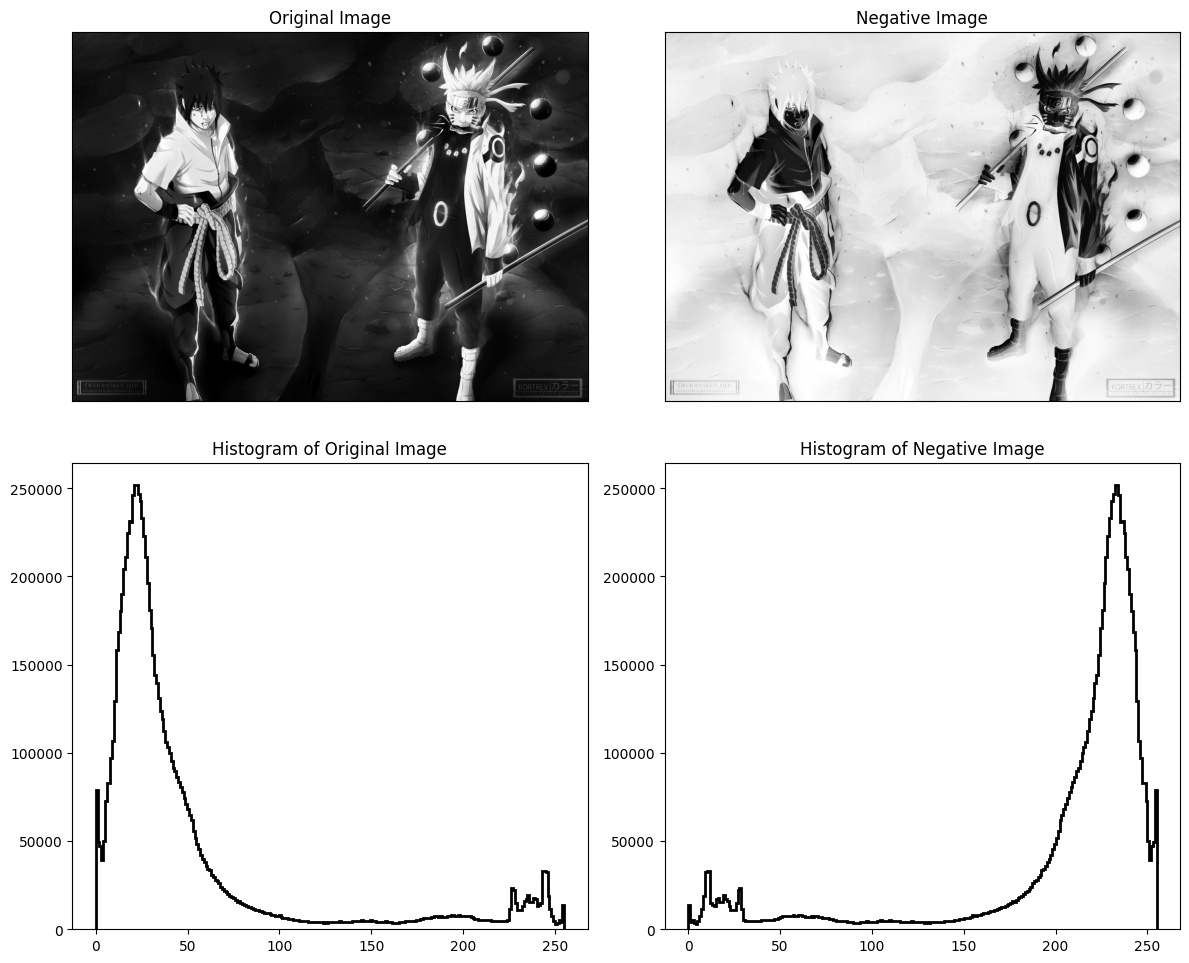

In [7]:
import cv2

import numpy as np

import matplotlib.pyplot as plt


# Load the image in grayscale (change the path to your image)

image = cv2.imread('naruto.png', cv2.IMREAD_GRAYSCALE)


# Generate the negative image

negative_image = 255 - image


# Plot the original and negative image along with their histograms

plt.figure(figsize=(12, 10))


# Plot original image

plt.subplot(2, 2, 1)

plt.imshow(image, cmap='gray')

plt.title('Original Image')

plt.xticks([]), plt.yticks([])


# Plot negative image

plt.subplot(2, 2, 2)

plt.imshow(negative_image, cmap='gray')

plt.title('Negative Image')

plt.xticks([]), plt.yticks([])


# Plot histogram for original image

plt.subplot(2, 2, 3)

plt.hist(image.ravel(), bins=256, color='black', histtype='step', linewidth=2)

plt.title('Histogram of Original Image')


# Plot histogram for negative image

plt.subplot(2, 2, 4)

plt.hist(negative_image.ravel(), bins=256, color='black', histtype='step', linewidth=2)

plt.title('Histogram of Negative Image')


# Adjust layout to prevent overlap

plt.tight_layout()

plt.show()

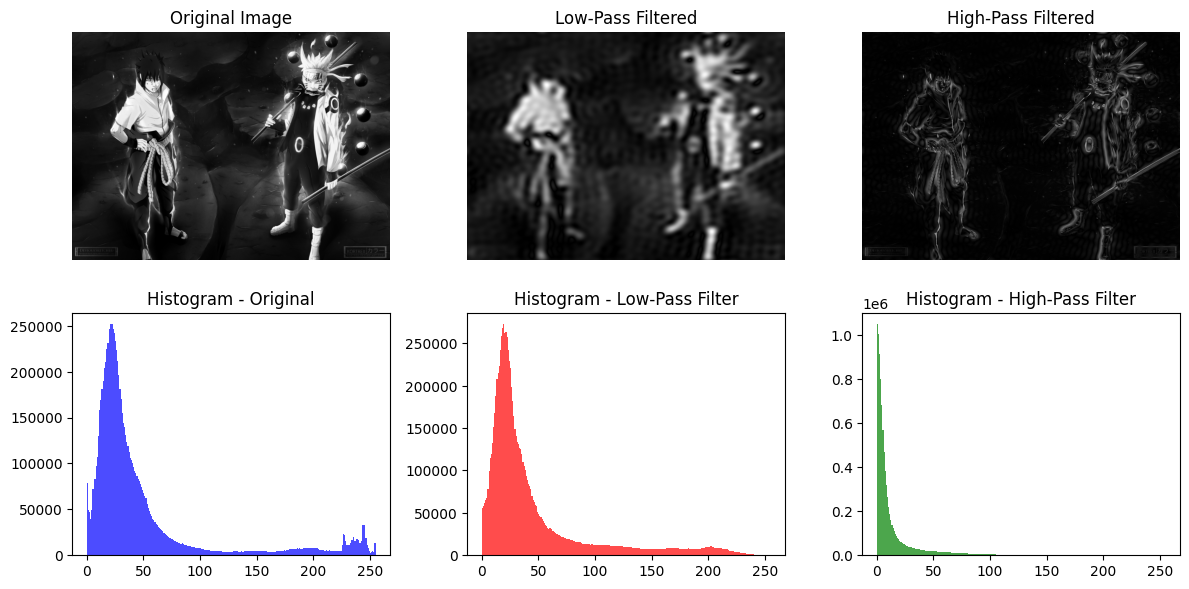

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("naruto.png", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found. Make sure 'image.jpg' exists in the directory.")

dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

lpf_mask = np.zeros((rows, cols), np.uint8)
radius = 30
cv2.circle(lpf_mask, (ccol, crow), radius, 1, thickness=-1)  # Create a circular mask
lpf_dft = dft_shift * lpf_mask  # Apply mask
lpf_image = np.abs(np.fft.ifft2(np.fft.ifftshift(lpf_dft)))  # Inverse DFT

# High-Pass Filter (HPF)
hpf_mask = np.ones((rows, cols), np.uint8)
cv2.circle(hpf_mask, (ccol, crow), radius, 0, thickness=-1)  # Create a circular mask
hpf_dft = dft_shift * hpf_mask  # Apply mask
hpf_image = np.abs(np.fft.ifft2(np.fft.ifftshift(hpf_dft)))  # Inverse DFT

# Normalize images for better visualization
lpf_image = cv2.normalize(lpf_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
hpf_image = cv2.normalize(hpf_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Plot Original and Filtered Images
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(lpf_image, cmap="gray")
plt.title("Low-Pass Filtered")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(hpf_image, cmap="gray")
plt.title("High-Pass Filtered")
plt.axis("off")

# Plot Histograms
plt.subplot(2, 3, 4)
plt.hist(image.ravel(), bins=256, color="b", alpha=0.7)
plt.title("Histogram - Original")

plt.subplot(2, 3, 5)
plt.hist(lpf_image.ravel(), bins=256, color="r", alpha=0.7)
plt.title("Histogram - Low-Pass Filter")

plt.subplot(2, 3, 6)
plt.hist(hpf_image.ravel(), bins=256, color="g", alpha=0.7)
plt.title("Histogram - High-Pass Filter")

plt.tight_layout()
plt.show()

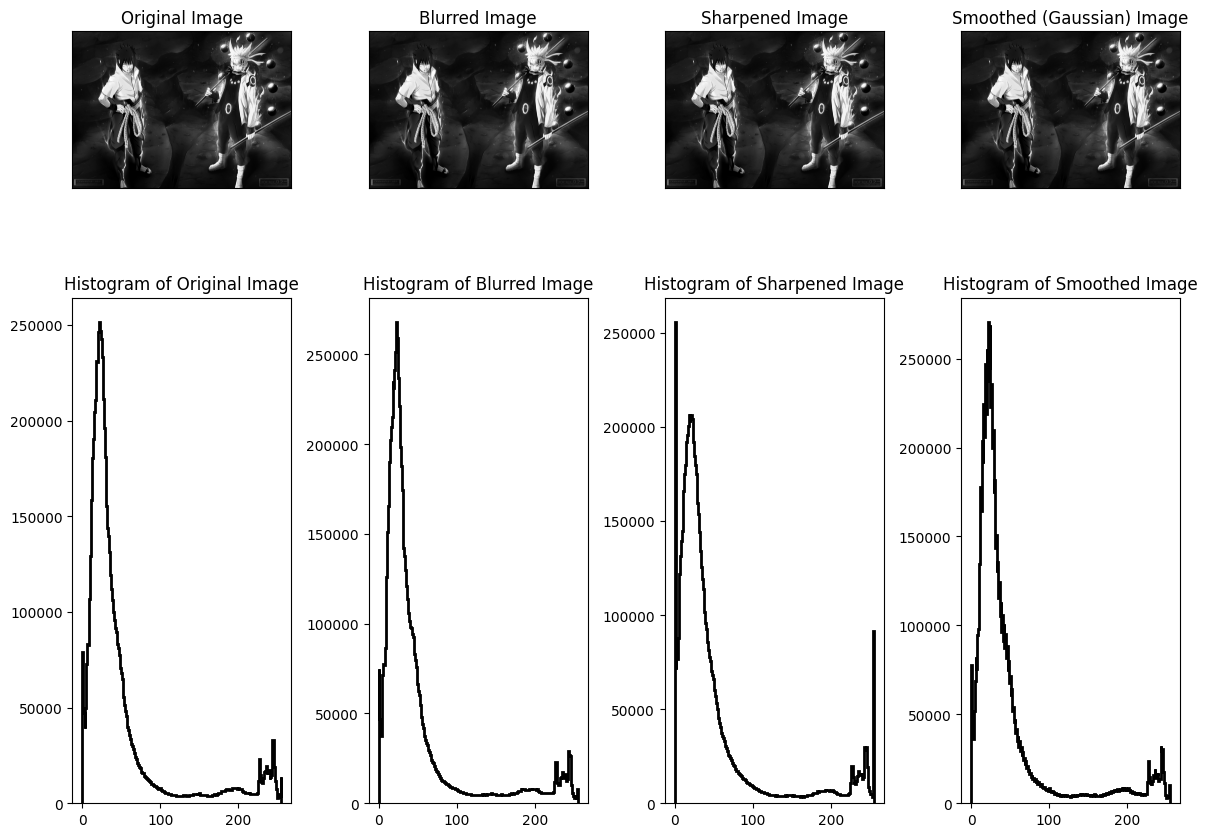

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale (change the path to your image)
image = cv2.imread('naruto.png', cv2.IMREAD_GRAYSCALE)

# Define the kernels
blur_kernel = np.ones((5, 5), np.float32) / 25  # Averaging Kernel for Blurring
sharpen_kernel = np.array([[ 0, -1,  0],
                            [-1,  5, -1],
                            [ 0, -1,  0]])  # Sharpening Kernel
gaussian_kernel = (1/16) * np.array([[1, 2, 1],
                                     [2, 4, 2],
                                     [1, 2, 1]])  # Gaussian Smoothing Kernel

# Apply Filters
blurred = cv2.filter2D(image, -1, blur_kernel)  # Apply Blurring
sharpened = cv2.filter2D(image, -1, sharpen_kernel)  # Apply Sharpening
smoothed = cv2.filter2D(image, -1, gaussian_kernel)  # Apply Gaussian Smoothing
blurred = cv2.filter2D(image, -1, blur_kernel)  # Apply Blurring
sharpened = cv2.filter2D(image, -1, sharpen_kernel)  # Apply Sharpening
smoothed = cv2.filter2D(image, -1, gaussian_kernel)  # Apply Gaussian Smoothing

# Plot the images and histograms
plt.figure(figsize=(12, 10))

# Plot original image
plt.subplot(2, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

# Plot blurred image
plt.subplot(2, 4, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')
plt.xticks([]), plt.yticks([])

# Plot sharpened image
plt.subplot(2, 4, 3)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Image')
plt.xticks([]), plt.yticks([])

# Plot smoothed image
plt.subplot(2, 4, 4)
plt.imshow(smoothed, cmap='gray')
plt.title('Smoothed (Gaussian) Image')
plt.xticks([]), plt.yticks([])

# Plot histogram for original image
plt.subplot(2, 4, 5)
plt.hist(image.ravel(), bins=256, color='black', histtype='step', linewidth=2)
plt.title('Histogram of Original Image')

# Plot histogram for blurred image
plt.subplot(2, 4, 6)
plt.hist(blurred.ravel(), bins=256, color='black', histtype='step', linewidth=2)
plt.title('Histogram of Blurred Image')

# Plot histogram for sharpened image
plt.subplot(2, 4, 7)
plt.hist(sharpened.ravel(), bins=256, color='black', histtype='step', linewidth=2)
plt.title('Histogram of Sharpened Image')

# Plot histogram for smoothed image
plt.subplot(2, 4, 8)
plt.hist(smoothed.ravel(), bins=256, color='black', histtype='step', linewidth=2)
plt.title('Histogram of Smoothed Image')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


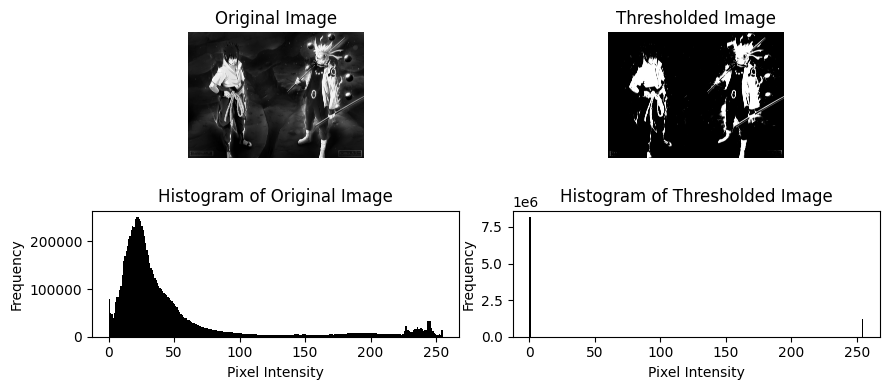

In [10]:
val, t = cv2.threshold(image, 90, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(9, 4))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(t, cmap="gray")
plt.title("Thresholded Image")
plt.axis("off")
plt.subplot(2, 2, 3)
plt.hist(image.ravel(), bins=256, color='black')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.subplot(2, 2, 4)
plt.hist(t.ravel(), bins=256, color='black')
plt.title("Histogram of Thresholded Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

